# Hacker Statistics
by: Paul Jeffries


In [1]:
import datetime
print('Last Updated On: ', datetime.datetime.today().strftime('%Y-%m-%d'))

Last Updated On:  2018-11-17


In [2]:
# key packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# some basic setup code to ensure we are using the right paths
%pwd

'/Users/pauljeffries/Desktop/personal/personal_code/data-science-toolkit-master/hypothesis-tests'

## Bootstrap Sampling and Bootstrap Replicates

In [52]:
# Import the dataset from csv into a pandas df
projects_df = pd.read_csv('data/auto-mpg.csv', na_values='?')

# Print the head of the df to inspect what we imported
print(projects_df.head())
print(projects_df.dropna().info())

# We'll subset the df and inspect
projects_df = projects_df.loc[:,['mpg','horsepower']].dropna()
print(projects_df.info())

# We'll pick just two columns--'usd_goal_real' and 'usd_pledged_real'--for our bootstrapping
mpg_col = projects_df['mpg']
horsepower_col = projects_df['horsepower']

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model year  origin                   car name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1              amc rebel sst  
4          70       1                ford torino  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non

In [53]:
# Before boostrapping, we should do some quick data quality checks
# In this case we're good to proceed
print("The total number of observations in this data is:", len(mpg_col))
print("There are a total of", (len(mpg_col) - len(mpg_col.dropna())), "nulls in usd_goal_col.")

print("The total number of observations in this data is:", len(horsepower_col))
print("There are a total of", (len(horsepower_col) - len(horsepower_col.dropna())), "nulls in for usd_pledged_col.")

The total number of observations in this data is: 392
There are a total of 0 nulls in usd_goal_col.
The total number of observations in this data is: 392
There are a total of 0 nulls in for usd_pledged_col.


In [54]:
# While we don't have a null problem, I know from experience that the data have a bunch of ouliers

# I'll arbitrarily take care of this with a filter
# boolean_filter = ((mpg_col.values > 0) & (horsepower_col.values > 0))

# mpg_cleaned = pd.Series(data=mpg_col.values[boolean_filter], index=mpg_col.index[boolean_filter])
# print(mpg_cleaned.head())
# mpg_cleaned = pd.Series(data=mpg_col.values, index=mpg_col.index)
# horsepower_cleaned = pd.Series(data=horsepower_col.values, index=horsepower_col.index)

mpg_cleaned = mpg_col
horsepower_cleaned = horsepower_col

# horsepower_cleaned = pd.Series(horsepower_col.values[boolean_filter], horsepower_col.index[boolean_filter])
# print(horsepower_cleaned.head())

### Single Variable Boostrapping (1-Dimension)

In [55]:
def bootstrap_replicate_1d(data,func,numb_obs_to_sample=100):
    """Generate boostrap replicate of 1D data."""
    bs_sample = np.random.choice(data, numb_obs_to_sample)
    return func(bs_sample)

In [56]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

0.39370926560373704
0.7726212087762282


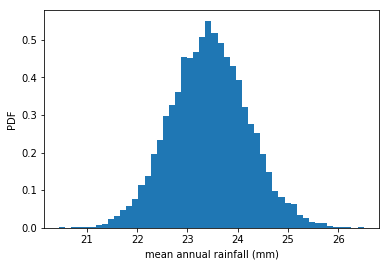

In [57]:
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(mpg_cleaned, np.mean, size=10000)

# Compute and print the standard error of the mean (SEM)
sem = np.std(mpg_cleaned) / np.sqrt(len(mpg_cleaned))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel('mean annual rainfall (mm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

In [58]:
# get the confidence bands based on our boostrapped replicates
np.percentile(bs_replicates,[2.5,97.5])

# Print the confidence interval (TO DO)
# print('95% confidence interval =', conf_int, 'games')

array([21.94495 , 24.999025])

### Pairs Boostrapping (2-Dimensions)

In [59]:
horsepower_cleaned.head()

0    130.0
1    165.0
2    150.0
3    150.0
4    140.0
Name: horsepower, dtype: float64

In [60]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(x = bs_x, y=bs_y, deg=1)

    return bs_slope_reps, bs_intercept_reps

[-4.2123811  -3.49819384]


/Users/pauljeffries/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


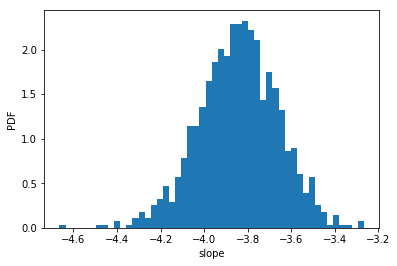

In [61]:
# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(
                    mpg_cleaned.values, horsepower_cleaned.values, size=1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5, 97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, normed=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

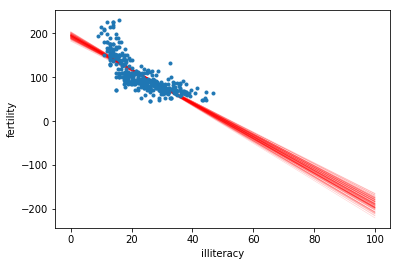

In [62]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0, 100])

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x, 
                 bs_slope_reps[i] * x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.plot(mpg_cleaned.values, horsepower_cleaned.values, marker='.', linestyle='none')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('illiteracy')
_ = plt.ylabel('fertility')
# _ = plt.xlim(0, 1000000)
# _ = plt.ylim(0, 1000000)
plt.show()